##### Deliverables:

- Submit files that have the name: <font color = 'red'>YourLastName_Exercise_4</font> that has the following files:

 1. Your **HTML file** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Construct hierarchical indexes
 - Select and group data to create pivot-tables
 - Use of lambda, map, pivot

 


# Specifications and Requirements


We're going to use the XYZ data again  to construct hierarchical indexes and select, modify, group, and reshape data in a wide variety of ways.  

In [1]:
import pandas as pd 
import numpy as np   
from pandas import Categorical 
from sqlalchemy import create_engine

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
engine = create_engine('sqlite:///xyz.db')

In [3]:
# .info gives same feedback as .dtype and .count
xyznew = pd.read_sql_table('xyzcust',engine)
xyznew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  30179 non-null  int64  
 1   ACCTNO                 30179 non-null  object 
 2   ZIP                    30179 non-null  int64  
 3   ZIP4                   30179 non-null  int64  
 4   LTD_SALES              30179 non-null  float64
 5   LTD_TRANSACTIONS       30179 non-null  int64  
 6   YTD_SALES_2009         30179 non-null  float64
 7   YTD_TRANSACTIONS_2009  30179 non-null  int64  
 8   CHANNEL_ACQUISITION    30179 non-null  object 
 9   BUYER_STATUS           30179 non-null  object 
 10  ZIP9_SUPERCODE         30179 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


### What can we learn from sales?

In [4]:
# look at characteristics 
xyznew['YTD_SALES_2009'].describe()

count     30179.000000
mean        236.283972
std        2117.042293
min           0.000000
25%           0.000000
50%           0.000000
75%         207.000000
max      351000.000000
Name: YTD_SALES_2009, dtype: float64

In [5]:
# We know there is more than one buyer status
# Are Inactive and Lapsed buyers skewing the statistics
temp = xyznew['YTD_SALES_2009'].groupby(xyznew['BUYER_STATUS']).sum()
temp

BUYER_STATUS
ACTIVE      7130814.0
INACTIVE          0.0
LAPSED            0.0
Name: YTD_SALES_2009, dtype: float64

In [6]:
# isolate only active customers
temp = xyznew[xyznew['BUYER_STATUS'] == 'ACTIVE'] 
temp['YTD_SALES_2009'].describe()

count     13332.000000
mean        534.864536
std        3160.079031
min           3.000000
25%         114.000000
50%         246.000000
75%         558.000000
max      351000.000000
Name: YTD_SALES_2009, dtype: float64

In [7]:
# the max number appears to be an outlier, but it is a confirmed sale
# lets look at stats without it anyways
temp = temp[temp['YTD_SALES_2009'] < 350000]
temp['YTD_SALES_2009'].describe()

count    13331.000000
mean       508.575051
std        878.588664
min          3.000000
25%        114.000000
50%        246.000000
75%        558.000000
max      28002.000000
Name: YTD_SALES_2009, dtype: float64

In [8]:
# heavyCut will be used to slice/dice our customers into strong buyers
# mean is $509
# median is $246
# sd is $879
# let's try a cut number using the median
heavyCut= 246

In [9]:
# creating a derived variable from existing data
# create a categorial variable of either a 1 or 0 based upon the value of heavyCut
# YTD_SALES_2009 greater than the heavyCut value will be assigned a 1
heavyCat = Categorical(np.where(xyznew.YTD_SALES_2009 > heavyCut,1,0))
heavyCat.describe()

,counts,freqs
categories,,
0,23543,0.780112
1,6636,0.219888


In [10]:
# be more descriptive than a 1 or a 0
heavyCat.rename_categories(['regular','heavy'],inplace=True)
heavyCat.describe()

,counts,freqs
categories,,
regular,23543,0.780112
heavy,6636,0.219888


In [11]:
# look at the first ten records
heavyCat[:10]
type(heavyCat)

['regular', 'heavy', 'regular', 'regular', 'regular', 'regular', 'heavy', 'regular', 'regular', 'regular']
Categories (2, object): ['regular', 'heavy']

pandas.core.arrays.categorical.Categorical

In [12]:
# create a new column with this variable
xyznew['heavyCat'] = heavyCat
xyznew.head(10)

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE,heavyCat
0,0,WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016,regular
1,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750,heavy
2,2,GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900,regular
3,3,PGGYDYWAD,60068,3838,6552.0,6,0.0,0,RT,INACTIVE,600683838,regular
4,4,LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932,regular
5,5,LQGYDGSYQ,60085,8670,4278.0,12,102.0,1,RT,ACTIVE,600858670,regular
6,6,WGQWQDPDA,60091,3447,1869.0,5,495.0,1,RT,ACTIVE,600913447,heavy
7,7,LPASPGYLS,60091,1613,33.0,1,33.0,1,RT,ACTIVE,600911613,regular
8,8,GPGDSHGL,60068,3668,735.0,2,0.0,0,RT,INACTIVE,600683668,regular
9,9,PQHSWQSDQ,60091,0,468.0,2,0.0,0,RT,INACTIVE,600911759,regular


In [13]:
# to see heavyCat with channel acquisition
pd.crosstab(xyznew['heavyCat'], xyznew['CHANNEL_ACQUISITION'])

CHANNEL_ACQUISITION,CB,IB,RT
heavyCat,,,
regular,1353,3149,19041
heavy,509,1026,5101


In [14]:
# a dummy variable marks the field as either 1 or 0
buyerType = pd.get_dummies(heavyCat)
buyerType[:3]
type(buyerType)

,regular,heavy
0,1,0
1,0,1
2,1,0


pandas.core.frame.DataFrame

In [15]:
# create new columns
xyznew['typeReg']=buyerType['regular']
xyznew['typeHeavy']=buyerType['heavy']

xyznew.columns

# look at new variables
xyznew.sample(5).transpose

Index(['index', 'ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_SUPERCODE', 'heavyCat', 'typeReg', 'typeHeavy'],
      dtype='object')

<bound method DataFrame.transpose of        index     ACCTNO    ZIP  ZIP4  LTD_SALES  LTD_TRANSACTIONS  \
22334  22552   DLDSLHLL  60093  3518     1650.0                18   
16382  16548  PQQPADPHY  60084  5022      447.0                 1   
28686  28968  AQQSGSAHS  60056  1432     1206.0                 6   
9341    9436  WPLDAAPGP  60070  1028      345.0                 1   
25956  26213  LPAWGAPLY  60093     0      876.0                 3   

       YTD_SALES_2009  YTD_TRANSACTIONS_2009 CHANNEL_ACQUISITION BUYER_STATUS  \
22334            84.0                      1                  RT       ACTIVE   
16382             0.0                      0                  IB       LAPSED   
28686            84.0                      1                  RT       ACTIVE   
9341              0.0                      0                  RT       LAPSED   
25956             0.0                      0                  RT     INACTIVE   

       ZIP9_SUPERCODE heavyCat  typeReg  typeHeavy  
22334   

In [16]:
# read in xyztrans data

xyztrans = pd.read_sql('xyztrans', engine)
xyztrans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62395 entries, 0 to 62394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         62395 non-null  int64  
 1   ACCTNO        62395 non-null  object 
 2   QTY           62395 non-null  int64  
 3   TRANDATE      62395 non-null  object 
 4   TRAN_CHANNEL  62395 non-null  object 
 5   PRICE         62395 non-null  float64
 6   TOTAMT        62395 non-null  float64
 7   ORDERNO       62395 non-null  object 
 8   DEPTDESCR     62395 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.3+ MB


In [17]:
# what is in dept description?
xyztrans['DEPTDESCR'].value_counts()


Mobile Electronic Accessories    18007
Small Appliances                 15641
Mobile Electronics               13063
Home Audio                        7257
Portable Electronics              5691
Cameras & Camcorder Accessori     2732
Appliances                           4
Name: DEPTDESCR, dtype: int64

In [18]:
# for this exercises we need to create trCountsChrono object  
# working with date fields

trandate = xyztrans['TRANDATE'] # should be a Series
type(trandate)

daystr = trandate.str[0:2] # two digit date numbers slice

mostr = trandate.str[2:5] # the three letter month abbreviations

yearstr = trandate.str[5:] # four digit years

# show deconstructed date and original date
print(daystr[0],mostr[0],yearstr[0],xyztrans.TRANDATE[0])

pandas.core.series.Series

09 JUN 2009 09JUN2009


In [19]:
#create a dictionary for the months
monums = {'JAN':'1', 'FEB':'2', 'MAR':'3', 'APR':'4', 'MAY':'5', 'JUN':'6', 
        'JUL':'7', 'AUG':'8', 'SEP':'9', 'OCT':'10', 'NOV':'11','DEC':'12'}
#month
monos = mostr.map(monums)	# do a dict lookup for each value of mostr

transtr = yearstr + '-' + monos + '-' + daystr

# show reconstruction with month numbers
print(transtr[0])

2009-6-09


In [20]:
# convert to datetime values
trDateTime = pd.to_datetime(transtr)

# look at counts by date
trCounts = trDateTime.value_counts()
trCounts

2009-12-19    877
2009-12-21    836
2009-12-12    782
2009-12-23    765
2009-12-20    744
             ... 
2009-08-15     11
2009-04-12     10
2009-10-13     10
2009-08-21      6
2009-03-15      5
Name: TRANDATE, Length: 365, dtype: int64

In [21]:
# create a new index
newIndex = pd.date_range(trCounts.index.min(),trCounts.index.max())

# use the new index to change order
trCountsChrono = trCounts.reindex(index=newIndex)
print(trCountsChrono.head())

2009-01-01    176
2009-01-02    305
2009-01-03    365
2009-01-04    231
2009-01-05    144
Freq: D, Name: TRANDATE, dtype: int64


In [22]:
# when coming across new code, if you are unsure of what it is doing
# deconstruct the code by printing out parts of the code
newIndex

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [23]:
# initialize a dataframe
trDF = pd.DataFrame()

In [24]:
# load dataframe with 2 columns
trDF['date'] = trCountsChrono.index
trDF['transactions'] = trCountsChrono.values

# what was created
trDF.columns
trDF.info()
trDF.head()

Index(['date', 'transactions'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          365 non-null    datetime64[ns]
 1   transactions  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


,date,transactions
0,2009-01-01,176
1,2009-01-02,305
2,2009-01-03,365
3,2009-01-04,231
4,2009-01-05,144


In [25]:
# create a constant based on the median
trMed = trDF['transactions'].median() 
trMed

136.0

In [ ]:
# ------------- lambda -----------------------------------
# 4.7.6 in the following documentation
# https://docs.python.org/3/tutorial/controlflow.html
# --------------------------------------------------------
# if the value is greater than or equal to the median, then heavy
heavyLight = lambda x  : x >= trMed and 'heavy' or 'light'   

https://docs.python.org/3/library/functions.html#map
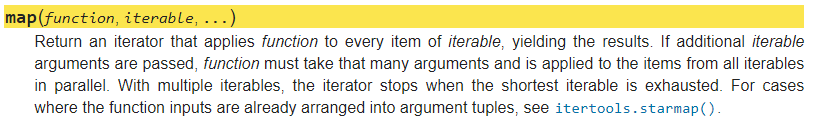

In [ ]:
# use map to call lambda
trDF['vol'] = trDF['transactions'].map(heavyLight) # 'vol' is the heavy/light column
trDF.head(10)

In [ ]:
# extract the month from our date
trDF['monum'] = trDF.date.dt.month 

In [ ]:
# making a copy of trDF while also dropping date as a column
# axis=1 means here a column is selected to drop
trDFnd = trDF.drop('date',axis=1)
trDFnd.head()

In [ ]:
# remember that drop gave us a whole new copy of the dataframe
id(trDF)
id(trDFnd)

In [ ]:
trDFgrouped = trDFnd.groupby(['monum','vol']).sum()
trDFgrouped.head()
trDFgrouped.info() #notice the multi index on the dataframe

In [ ]:
# check out the indexes
trDFgrouped.index.levels

In [ ]:
# with indexes you can reference specific data easily
trDFgrouped.loc[11,'heavy']

In [ ]:
# first six months of data
trDFgrouped.loc[list(range(1,7))]

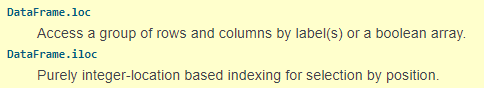

In [ ]:
# or the first 6 rows of data:
trDFgrouped.iloc[0:6] # .iloc here, but .loc above.

In [ ]:
trDFgrouped[(3,'light'):(7,'heavy')]

In [ ]:
trDFgrouped[(3,'light'):6]

In [ ]:
# pandas xs returns a cross section from Series/DataFrame
trDFgrouped.xs('light',level='vol')

In [ ]:
trDFgrouped.xs('light',level='vol').T # the transpose of the above

In [ ]:
# remember we read in xyznew from xyz.db
# lets slice out three columns
xyzdata = xyznew[['BUYER_STATUS','heavyCat','CHANNEL_ACQUISITION']]

In [ ]:
xyzgrouped = xyzdata.groupby(['BUYER_STATUS','heavyCat','CHANNEL_ACQUISITION'])


In [ ]:
xyzCountData = xyzgrouped.size() # a MultiIndexed Series of counts
xyzCountData

In [ ]:
print(xyzCountData.unstack())

In [ ]:
xyzcust = xyznew[['BUYER_STATUS','heavyCat','LTD_SALES']].copy()

In [ ]:
xyzcustm = pd.melt(xyzcust,id_vars=['BUYER_STATUS','heavyCat'],var_name="LTD_SALES")

type(xyzcustm)
print(xyzcustm)

In [ ]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',index=['BUYER_STATUS','heavyCat'],columns=['CHANNEL_ACQUISITION'])


In [ ]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'])


In [ ]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',
               index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'],aggfunc=np.sum)


In [ ]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',
               index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'],aggfunc=np.sum,margins=True)


In [ ]:
xyzGrouper=xyznew.groupby(['BUYER_STATUS','heavyCat'])

In [ ]:
xyzGrouper.agg({'YTD_SALES_2009': [np.mean, np.std],'LTD_SALES':[np.mean,np.std]})


In [ ]:
def coefV(x):                       # a baby CV function that accepts a sequence
    return np.std(x)/np.mean(x)


In [ ]:
buyerStats=xyznew[['BUYER_STATUS','LTD_SALES','LTD_TRANSACTIONS']]
buyerGrouper=buyerStats.groupby(['BUYER_STATUS'])
buyerGrouper.agg(coefV)

In [ ]:
def ptiles(x):
    p5=np.percentile(x,5)
    p95=np.percentile(x,95)
    return p5, p95


In [ ]:
buyerGrouper.agg([np.mean, ptiles])

In [ ]:
buyerGrouper.agg([np.mean,ptiles]).loc['ACTIVE','LTD_SALES']

<div class="alert alert-block alert-warning">

# Requirements :

Answer your homework questions below; add as many cells as needed.
</div>

## Requirement 1 (7 points)

a) Of the Active customers only, show a crosstab of heavyCat and channel acquisition.  <br>
b) Of the non-Active customers, show a crosstab of heavyCat and channel acquisition.

## Requirement 2 (7 points)

a) Create a dataframe with LTD Sales, 2009 Sales, Channel Acquistion and heavyCat for all customers. <br>
b) Using Groupby, show mean LTD Sales and 2009 Sales by Channel Acquistion and heavyCat.

## Requirement 3 (7 points)

Consider the multi-indexed file trDFgrouped. <br>
a) Show the values of May for both heavy and light without using .loc or .iloc <br>
b) use .loc to show the values of June heavy/light through July heavy/light <br>
c) use .iloc to show the values of June heavy/light through July heavy/light <br>

## Requirement 4 (14 points)

a) Create a dataframe with xyztrans data of department description, total amount and trans date month (not the full trandate field). It is okay to leave the month as the three letter abbreviation or you can convert to a number.   <br>
b) Create a pivot from the dataframe to show total amount totals (not means, but totals) by Month and by department description   <br>
c) The pivot shows NaN's.  Explain why the NaN's show up in the pivot, but did not show in the your starting dataframe.  Show how you came up with your answer.  

## Requirement 5 (5 points)

Take the pivot from Requirement 4 and represent the NaN's as zeroes.